In [10]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='3'
from tensorflow import keras
from matplotlib import pyplot as plt



Data Read Done!
Training x size :(50000, 32, 32)
Training y size :(50000, 1)
Test x size :(50000, 32, 32)
Test y size :(50000, 1)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2152 - loss: 2.1368 - val_accuracy: 0.2654 - val_loss: 2.0071
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3031 - loss: 1.9500 - val_accuracy: 0.3125 - val_loss: 1.9165
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3279 - loss: 1.8822 - val_accuracy: 0.3451 - val_loss: 1.8547
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3503 - loss: 1.8411 - val_accuracy: 0.3355 - val_loss: 1.8595
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3550 - loss: 1.8128 - val_accuracy: 0.3371 - val_loss: 1.8633
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3673 - loss: 1.7906 - val_accuracy: 0.3497 - val_loss: 1.8317
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3713 - loss

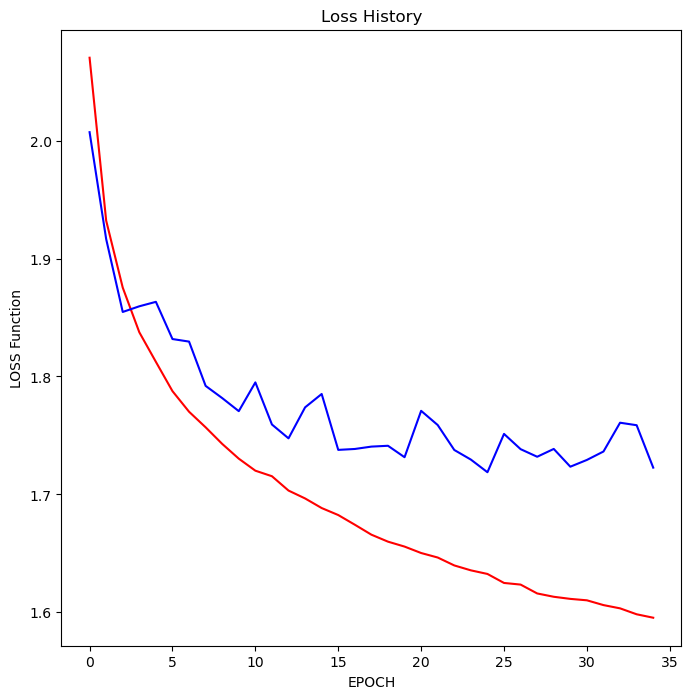

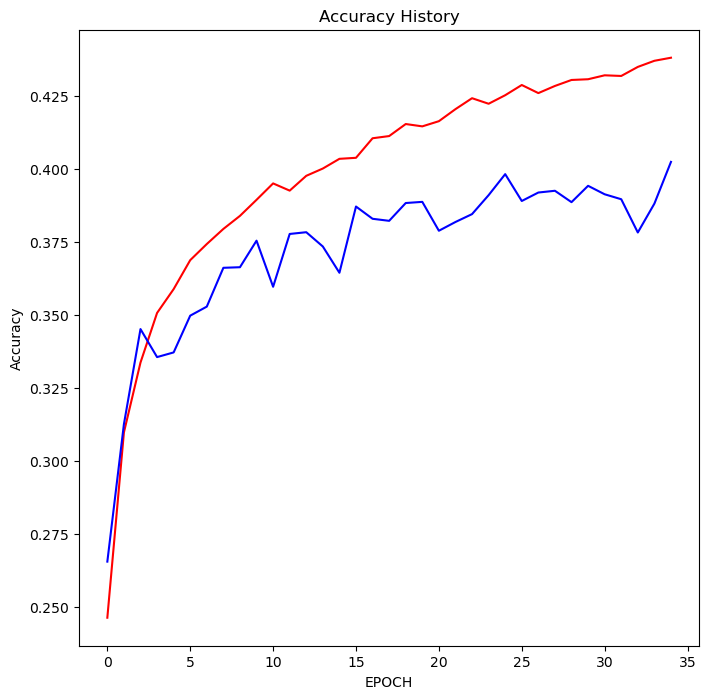

In [18]:
class DataReader:
    def __init__(self):
        self.label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
        self.cifar = keras.datasets.cifar10
        (self.origin_train_x, self.train_y), (self.origin_test_x, self.test_y) = self.cifar.load_data()
        self.train_x = self.preprocess(self.origin_train_x)
        self.test_x = self.preprocess(self.origin_test_x)

        print('\n\nData Read Done!')
        print('Training x size :' +str(self.train_x.shape))
        print('Training y size :' +str(self.train_y.shape))
        print('Test x size :' +str(self.train_x.shape))
        print('Test y size :' +str(self.train_y.shape) + '\n\n')

    def preprocess(self, images):
        images = images/ 255.0
        r = images[:,:,:,0]
        g = images[:,:,:,1]
        b = images[:,:,:,2]
        return (r + g + b) /3.0
dr = DataReader()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(dr.train_x, dr.train_y, epochs =100, validation_split=0.2, callbacks=[early_stop])

train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")